## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2023, Prof. J.C. Kao, TAs: T.M, P.L, R.G, K.K, N.V, S.R, S.P, M.E

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

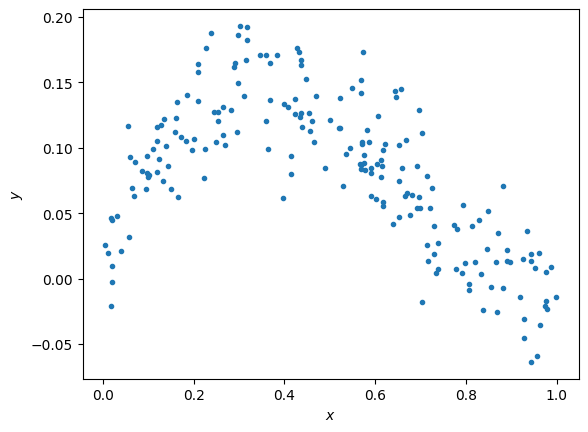

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) Uniform distribution with min=0 and max=1.

(2) Normal distribution with mean=0 and std=0.03.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [28]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]


def solve_lr(xhat, y):
    x = xhat.T
    xtx = x.T.dot(x)
    xty = x.T.dot(y)
    theta = np.linalg.inv(xtx).dot(xty)
    return theta


theta = solve_lr(xhat, y)

# ================== #
# END YOUR CODE HERE #
# ================== #

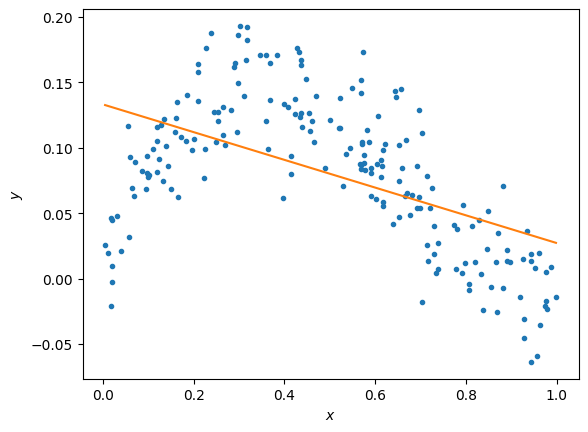

In [29]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x), 50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) It obviously underfits the data.

(2) Adding higher order terms can improve the model.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [43]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

for i in range(1, N + 1):
    xhat = np.vstack((x**j for j in range(i, 0, -1)))
    xhat = np.vstack((xhat, np.ones_like(x)))
    theta = solve_lr(xhat, y)
    xhats.append(xhat)
    thetas.append(theta)

# ================== #
# END YOUR CODE HERE #
# ================== #

/tmp/ipykernel_8534/1768994044.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  xhat = np.vstack((x**j for j in range(i, 0, -1)))


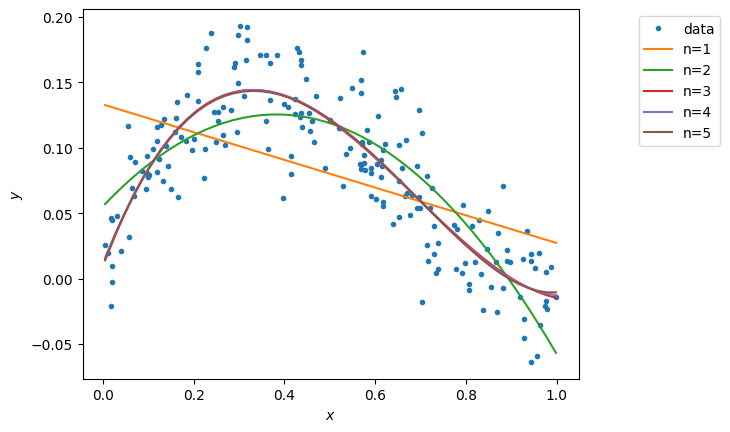

In [44]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x), 50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [47]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.


def compute_error(y, yhat):
    return 0.5 * ((y - yhat) ** 2).sum()


training_errors = [
    compute_error(y, xhat.T.dot(theta))
    for xhat, theta in zip(xhats, thetas)
]

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.2379961088362701, 0.1092492220926853, 0.08169603801105374, 0.08165353735296982, 0.08161479195525295]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) Polynomial with order=5 has the best training error.

(2) Since a higher order polynomial can fit as well as a lower one by setting the extra coefficients to 0, the polynomial with the highest order should fit the data best.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

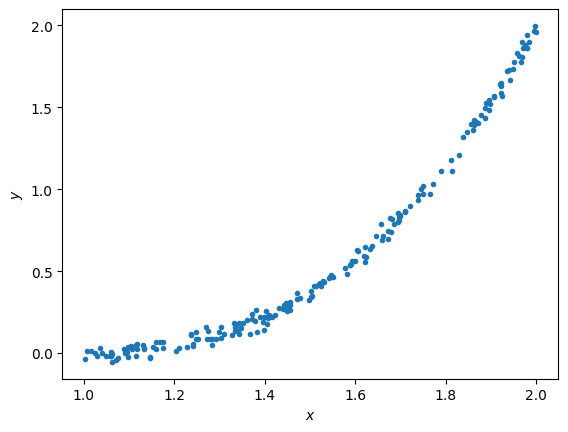

In [48]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [49]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x), 50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

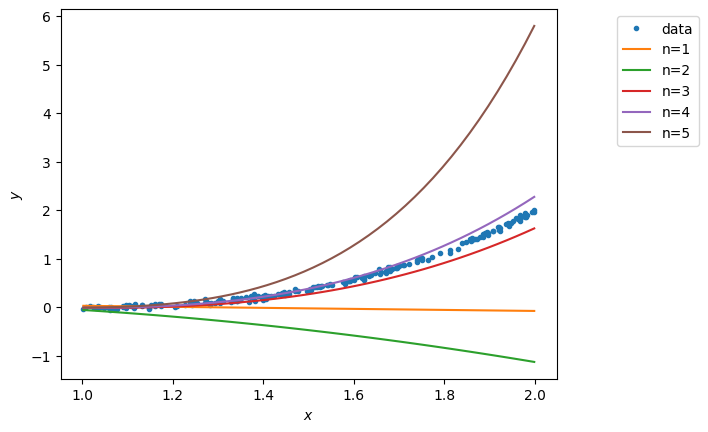

In [50]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x), 50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [51]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.

testing_errors = [
    compute_error(y, xhat.T.dot(theta))
    for xhat, theta in zip(xhats, thetas)
]

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [80.86165184550586, 213.19192445057917, 3.1256971084083736, 1.1870765211495653, 214.91021747199082]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) Polynomial with order=4 has the best testing error.

(2) Since it uses coefficient of higher orders to fit the data, this makes the curve go up too much when $x>1$.